<a href="https://colab.research.google.com/github/sah72/CISC-451-839-final_project-report/blob/main/Final_Project_CISC451_839.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CISC 451/839 Project


# Libraries

In [1168]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from scipy import stats

# Importing Data

In [1169]:
# connect to drive to pull data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1170]:
# read data into pandas dataframes
# path to google drive data location
path = './drive/My Drive/project_data/'
# if you would rather not use google drive, simply upload the data to the google
# colab runtime and change path to './'

covid_df = pd.read_csv(path + 'state_covid.csv')
hospitals_df = pd.read_csv(path + 'hospitals_beds.csv')
literacy_df = pd.read_csv(path + 'literacy.csv')
population_df = pd.read_csv(path + 'population.csv')
state_ndp_df = pd.read_csv(path + 'state_ndp.csv')
state_pc_df = pd.read_csv(path + 'state_pc.csv')
state_sdp_df = pd.read_csv(path + 'state_sdp.csv')

# Functions

In [1171]:
# used to remove numeric values that are outside of 3 std devs from the mean
# in each col of a dataframe 
def remove_outliers(df, name_col):
  # Calculates the 25th and 75th percentiles to find the interquartile range.
  Q1 = df[name_col].quantile(0.25)
  Q3 = df[name_col].quantile(0.75)
  IQR = Q3-Q1

  # Removes outliers from the data.
  outlier = df[((df[name_col] < (Q1 - 1.5 * IQR)) | (df[name_col] > (Q3 + 1.5 * IQR)))]
  data = df[~((df[name_col] < (Q1 - 1.5 * IQR)) | (df[name_col] > (Q3 + 1.5 * IQR)))]
  return data, outlier

# Data Preprocessing
**Task 1** - Drop unnecessary columns (IDs, redundant features, etc.) & Rename necessary column headers

**Task 2** - Remove records for states/territories that aren't shared across all datasets

**Task 3** - Remove outliers

**Task 4** - Analyze results with visualizations

In [1172]:
# list of the 28 Indian states
# some of our data includes territories as well as states, but they are not all consistent 
# about which territories they include, so we will remove all non-states
states = ['andhra pradesh', 'arunachal pradesh', 'assam', 'bihar', 'chhattisgarh', 'goa', 'gujarat', 'haryana', 'himachal pradesh', 'jharkhand', 'karnataka', 'kerala', 'madhya pradesh', 'maharashtra', 
          'manipur', 'meghalaya', 'mizoram', 'nagaland', 'odisha', 'punjab', 'rajasthan', 'sikkim', 'tamil nadu', 'telangana', 'tripura', 'uttar pradesh', 'uttarakhand', 'west bengal']

In [1173]:
# CLEANING FOR COVID TIMESERIES DATA - MAY BE USED FOR FINAL SUBMISSION
# # remove unneccessary cols
# covid_df = covid_df.drop(columns=['Latitude', 'Longitude'])
# # rename col to make mergeable with other dataframes
# covid_df = covid_df.rename(columns={'Name of State / UT': 'state'})
# # make all col headers lowercase
# covid_df.columns = map(str.lower, covid_df.columns)
# # replace empty space with '_'
# covid_df.columns = covid_df.columns.str.replace(' ', '_')
# # change states to lower-case
# covid_df['state'] = covid_df['state'].str.lower()
# # remove all states that aren't in our states list
# covid_df = covid_df[covid_df.state.isin(states)]

# remove unneccessary cols
covid_df = covid_df.drop(['Migrated_Other','State_code','Delta_Confirmed','Delta_Deaths',
                    'Last_Updated_Time', 'Delta_Recovered','State_Notes'], axis=1)
# make all col headers lowercase
covid_df.columns = map(str.lower, covid_df.columns)
# make all state values lowercase
covid_df['state'] = covid_df['state'].str.lower()
# remove states not in state list
covid_df = covid_df[covid_df.state.isin(states)]

In [1174]:
# CLEANING FOR DIFFERENT HOSPITAL DATA - MAY BE USED FOR FINAL SUBMISSION
# # change values in 1st row to fix header formatting issues
# hospitals_df.at[0, 'Srl no.'] = 'srl_no'
# hospitals_df.at[0, 'State / UT'] = 'state'
# # replace col headers with 1st row vals
# hospitals_df.columns = hospitals_df.iloc[0]
# # prepend 'hospitals_' to hospital values
# hospitals_df.columns = ['hospitals_' + i if ix < 6 and ix > 1 else i for ix, i in enumerate(hospitals_df.columns)]
# # prepend 'beds_' to bed values
# hospitals_df.columns = ['beds_' + i if ix > 5 else i for ix, i in enumerate(hospitals_df.columns)]
# # remove unnecessary col
# hospitals_df = hospitals_df.drop(columns=['srl_no'])
# # remove unneeded rows that were used for formatting
# hospitals_df = hospitals_df.drop(hospitals_df.index[[0, 1]])
# # make all col headers lowercase
# hospitals_df.columns = map(str.lower, hospitals_df.columns)
# # remove unwanted character '.' from col headers
# hospitals_df.columns = hospitals_df.columns.str.replace('.', '')
# # make all state values lowercase
# hospitals_df['state'] = hospitals_df['state'].str.lower()
# # remove states not in state list
# hospitals_df = hospitals_df[hospitals_df.state.isin(states)]

# remove unnecessary col
hospitals_df = hospitals_df.drop(['PHC','CHC','SDH','DH'], axis=1)
# rename cols to make them uniform with other dataframes
hospitals_df = hospitals_df.rename(columns={'Unnamed: 0':'state', 'Unnamed: 6':  'total_beds',
                                    'Total':'occupied_beds'})
# make all state values lowercase
hospitals_df['state'] = hospitals_df['state'].str.lower()
# remove states not in state list
hospitals_df = hospitals_df[hospitals_df.state.isin(states)]

In [1175]:
# rename cols for consistency with other dataframes
literacy_df = literacy_df.rename(columns={'State': 'state', 'Literacyrate': 'literacy_rate'})
# make all state values lowercase
literacy_df['state'] = literacy_df['state'].str.lower()
# fix naming errors in dataset
literacy_df = literacy_df.replace({'chattisgarh' : 'chhattisgarh', 'uttarkhand' : 'uttarakhand',
                                   'tamilnadu' : 'tamil nadu'})
# remove states not in state list
literacy_df = literacy_df[literacy_df.state.isin(states)]

In [1176]:
# rename cols for consistency with other dataframes
population_df = population_df.rename(columns={'State ': 'state', 'Population': 'population'})
# make all state values lowercase
population_df['state'] = population_df['state'].str.lower()
# fix naming errors in dataset
population_df = population_df.replace({'chattisgarh' : 'chhattisgarh', 'uttarkhand' : 'uttarakhand',
                                   'tamilnadu' : 'tamil nadu'})
# remove states not in state list
population_df = population_df[population_df.state.isin(states)]

In [1177]:
# APPLY SAME CLEANING TO EACH ECONOMIC STATISTIC
# replace headers with true header (due to formatting)
state_ndp_df.columns = state_ndp_df.iloc[3]
# remove formatting rows
state_ndp_df = state_ndp_df.drop(state_ndp_df.index[38:43])
state_ndp_df = state_ndp_df.drop(state_ndp_df.index[:5])
# drop unneccessary columns
state_ndp_df = state_ndp_df.drop(columns=['S. No.'])
# make header uniform with other dataframes
state_ndp_df = state_ndp_df.rename(columns={r'State\UT': 'state'})
state_ndp_df['state'] = state_ndp_df['state'].str.lower()
# remove states that aren't in state list
state_ndp_df = state_ndp_df[state_ndp_df.state.isin(states)]
state_ndp_df = state_ndp_df.dropna(axis=1, how='all')

state_pc_df.columns = state_pc_df.iloc[3]
state_pc_df = state_pc_df.drop(state_pc_df.index[38:43])
state_pc_df = state_pc_df.drop(state_pc_df.index[:5])
state_pc_df = state_pc_df.drop(columns=['S. No.'])
state_pc_df = state_pc_df.rename(columns={r'State\UT': 'state'})
state_pc_df['state'] = state_pc_df['state'].str.lower()
state_pc_df = state_pc_df[state_pc_df.state.isin(states)]
state_pc_df = state_pc_df.dropna(axis=1, how='all')


state_sdp_df.columns = state_sdp_df.iloc[3]
state_sdp_df = state_sdp_df.drop(state_sdp_df.index[38:43])
state_sdp_df = state_sdp_df.drop(state_sdp_df.index[:5])
state_sdp_df = state_sdp_df.drop(columns=['S. No.'])
state_sdp_df = state_sdp_df.rename(columns={r'State\UT': 'state'})
state_sdp_df['state'] = state_ndp_df['state'].str.lower()
state_sdp_df = state_sdp_df[state_sdp_df.state.isin(states)]
state_sdp_df = state_sdp_df.dropna(axis=1, how='all')

# for our current purposes, we only want the most recent complete economic data
# which is from 2018-19, so take that slice for each economic indicator
col_indices = [0, 8]
ndp_slice = state_ndp_df.iloc[:, col_indices]
pc_slice = state_pc_df.iloc[:, col_indices]
sdp_slice = state_sdp_df.iloc[:, col_indices]

# Visualizations

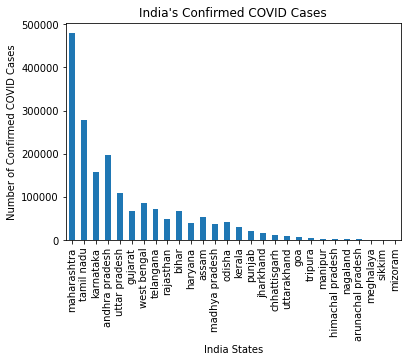

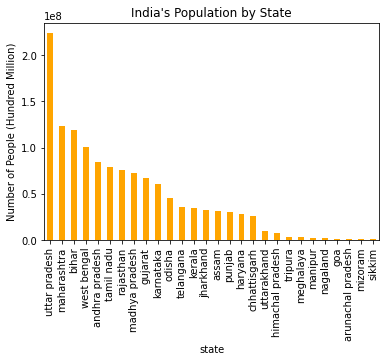

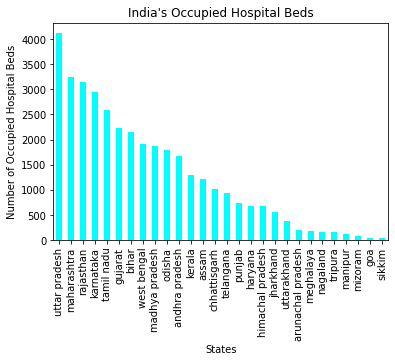

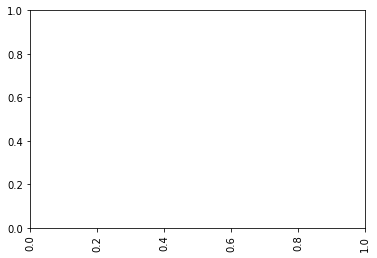

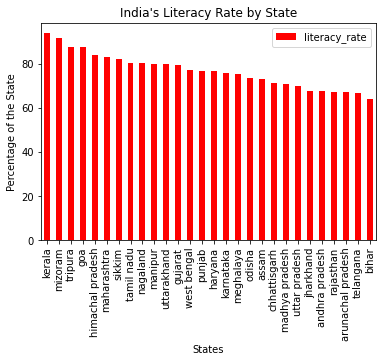

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


India's Net Domestic Product
3           2018-19
count  2.800000e+01
mean   4.229394e+05
std    4.350579e+05
min    1.279100e+04
25%    5.068000e+04
50%    3.368290e+05
75%    5.630462e+05
max    1.794123e+06


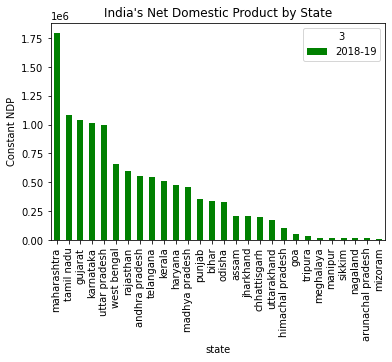

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


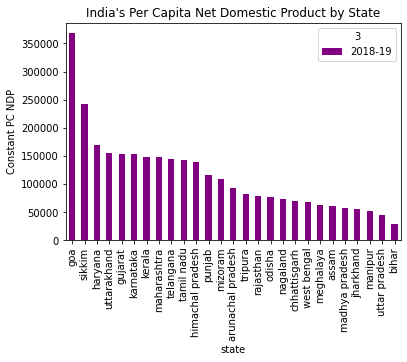

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


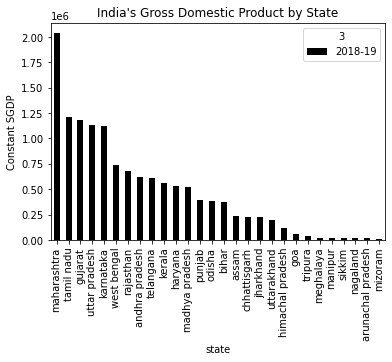

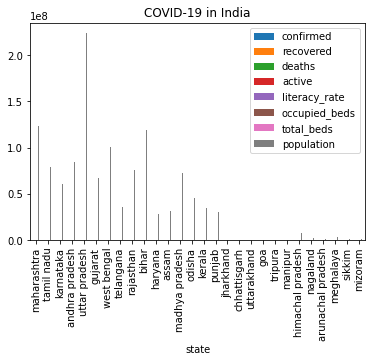

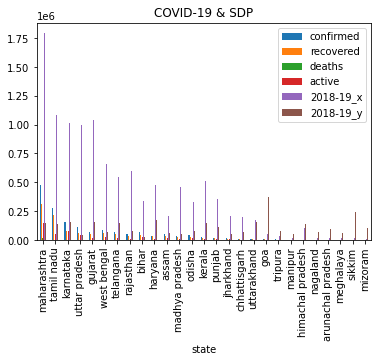

In [1178]:
# # plotting the India Covid data with Confirmed, Recovered, Deaths and Active columns
covid_df = covid_df.set_index('state')
covid_df['confirmed'].plot(kind='bar',ylabel='Number of Confirmed COVID Cases',
                                             xlabel="India States",
                                             title="India's Confirmed COVID Cases")
plt.show()
# # plotting the population in a sorted order
population_df = population_df.set_index('state')
population_df['population'].sort_values(ascending=False).plot(kind='bar', color='orange',
                                              title="India's Population by State",
                                            ylabel="Number of People (Hundred Million)")
plt.show()

hospitals_df['total_beds'] = hospitals_df['total_beds'].astype(int)                    
hospitals_df['occupied_beds'] = hospitals_df['occupied_beds'].astype(int)

hospitals_df = hospitals_df.set_index('state')
# displaying a snapshot of the current occupancy compared to total number of beds
hospitals_df['occupied_beds'].sort_values(ascending=False).plot(kind ='bar',color='cyan',
                                                  ylabel="Number of Occupied Hospital Beds",
                                                 xlabel='States',
                                                  title="India's Occupied Hospital Beds")
plt.show()

# rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# # displaying the literacy data as a bar graph
literacy_df = literacy_df.set_index('state')
literacy_df.sort_values(ascending=False,
                       by=['literacy_rate']).plot(kind = 'bar',
                                                  color = "r", 
                                                  title = "India's Literacy Rate by State",
                                                  xlabel="States",
                                                  ylabel = "Percentage of the State")
plt.show()
# convert target feature to float
ndp_slice['2018-19'] = ndp_slice['2018-19'].apply(lambda x: float(x))
ndp_slice = ndp_slice.set_index('state')
ndp_slice.sort_values(ascending=False,
                       by=['2018-19']).plot(kind = 'bar', 
                                           color="green",
                                                 title = "India's Net Domestic Product by State",
                                                 ylabel = "Constant NDP")
print("India's Net Domestic Product")
print(ndp_slice.describe())
plt.show()

# convert target feature to float
pc_slice['2018-19'] = pc_slice['2018-19'].apply(lambda x: float(x))
pc_slice = pc_slice.set_index('state')
pc_slice.sort_values(ascending=False,
                      by=['2018-19']).plot(kind = 'bar', 
                                           color="purple",
                                                 title = "India's Per Capita Net Domestic Product by State",
                                                 ylabel = "Constant PC NDP")
plt.show()

# convert target feature to float
sdp_slice['2018-19'] = sdp_slice['2018-19'].apply(lambda x: float(x))
sdp_slice = sdp_slice.set_index('state')
sdp_slice.sort_values(ascending=False,
                      by=['2018-19']).plot(kind = 'bar', color="black",
                                                 title = "India's Gross Domestic Product by State",
                                                 ylabel = "Constant SGDP")
plt.show()

# merge non-economic data with covid data 
merged_df = pd.merge(left=covid_df, right=literacy_df, left_on='state', right_on='state')
complete__df = pd.merge(left=merged_df, right=hospitals_df, left_on='state', right_on='state')
complete__df = pd.merge(left=complete__df, right=population_df, left_on='state', right_on='state')
complete__df.plot(kind='bar', title = 'COVID-19 in India')

# merge economic data with covid data
merged_eco_df = pd.merge(left=covid_df, right=ndp_slice, left_on='state', right_on='state')
complete_df = pd.merge(left=merged_eco_df, right=pc_slice, left_on='state', right_on='state')
complete_df.plot(kind='bar', title = 'COVID-19 & SDP')

###Feature Selection and Eliminating Outliers

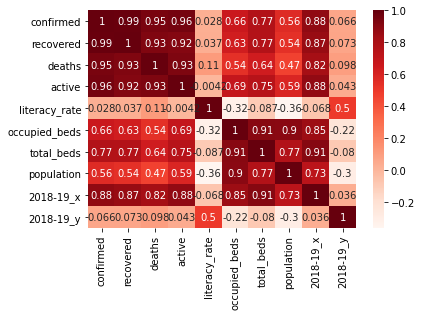

KeyError: ignored

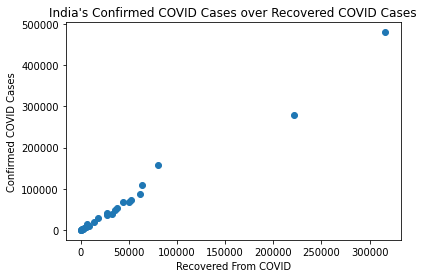

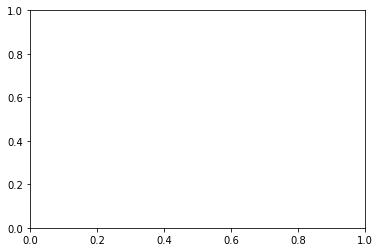

In [1179]:
import seaborn as sns

all_merged = pd.merge(left=complete__df, right=ndp_slice, left_on='state', right_on='state')
all_df = pd.merge(left=all_merged, right=pc_slice, left_on='state', right_on='state')

corr = all_df.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()


#Plotting the confirmed cases over the recovered COVID cases in India.
fig =plt.figure()
ax = fig.add_subplot()
plt.plot(all_df['recovered'], all_df['confirmed'], 'o')
plt.xlabel('Recovered From COVID')
plt.ylabel("Confirmed COVID Cases")
plt.title("India's Confirmed COVID Cases over Recovered COVID Cases")

#Plotting the confirmed cases over the deaths from COVID in India.
fig =plt.figure()
ax = fig.add_subplot()
plt.plot(all_df['death'], all_df['confirmed'], 'o')
plt.xlabel('Deaths from CoVIDes')
plt.ylabel("Confirmed COVID Cases")
plt.title("India's Confirmed COVID Cases over Deaths from COVID Cases")

#Plotting the confirmed cases over the deaths from COVID in India.
fig =plt.figure()
ax = fig.add_subplot()
plt.plot(all_df['active'], all_df['confirmed'], 'o')
plt.xlabel('Active COVID Cases')
plt.ylabel("Confirmed COVID Cases")
plt.title("India's Confirmed COVID Cases over Active COVID Cases")


#Plotting the confirmed cases over the deaths from COVID in India.
fig =plt.figure()
ax = fig.add_subplot()
plt.plot(all_df['total_beds'], all_df['occupied_beds'], 'o')
plt.xlabel('Total Hospital Beds')
plt.ylabel("Occupied Hospital Beds")
plt.title("India's Total Hospital Beds over Occupied Hospital Beds")


#Plotting the confirmed cases over the deaths from COVID in India.
fig =plt.figure()
ax = fig.add_subplot()
plt.plot(all_df['total_beds'], all_df['2018-19_x'], 'o')
plt.xlabel('Total Hospital Beds')
plt.ylabel("Net Domestic Product")
plt.title("Total Hospital Beds over Net Domestic Product")


plt.show()

# Creates a list of all the highly correlated features.
def correlated(data):
  # Gets the correlation matrix of the data.
  corr = data.corr().abs()

  # Selects the upper triangle of the correlation matrix.
  upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
  # Gets all the attributes where the correlation is greater than 0.9.
  to_drop = [column for column in upper_tri.columns if any(upper_tri[column]>0.90)]
  return to_drop

#Renaming attibute to per capita.
all_df = all_df.rename(columns={'2018-19_y':"per_capita"})

# The highly correlated attributes that were removed are
high_corr = correlated(all_df)
print(high_corr)
# Removes all the correlated features from the data.
all_df = all_df.drop(columns=high_corr)


names = all_df.columns
outlier_row =pd.DataFrame()

for i in names:
  all_df, outlier = remove_outliers(all_df,i)
  if(len(outlier)>0):
    outlier_row =outlier_row.append(outlier)
print(all_df.shape)


all_df.plot(kind='bar', title = 'COVID-19 & SDP')

outlier_row.plot(kind='bar', title='Outliers')


# Classification/Regression

This area is still TODO. We spent a lot of time working on cleaning the data for processing and visualizing our results. We are going to next focus on how to apply machine learning algorithms to our data in order to gain insight. 